# Before SMOTE

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def train_evaluate_model(model, X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class


    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    return accuracy, conf_matrix, classification_rep, roc_auc, fpr, tpr


In [131]:
# Load data
df = pd.read_csv(r"data\BankChurners_preprocessed.csv")
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),  
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

# Train and evaluate models
model_results = {}
for model_name, model in models.items():
    accuracy, conf_matrix, classification_rep, roc_auc, fpr, tpr = train_evaluate_model(model, X, y)
    model_results[model_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': classification_rep['weighted avg']['precision'],
        'Recall': classification_rep['weighted avg']['recall'],
        'F1-Score': classification_rep['weighted avg']['f1-score'],
        'Confusion Matrix': conf_matrix,
        'FPR': fpr,
        'TPR': tpr
    }

# Display results in a DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']])



c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy Precision    Recall  F1-Score   ROC AUC
KNN                  0.889931   0.88217  0.889931  0.883991  0.877049
Decision Tree        0.922014  0.921104  0.922014  0.921523  0.849782
Logistic Regression  0.859822  0.841662  0.859822   0.84442  0.857344
Random Forest        0.957058  0.956245  0.957058  0.955752  0.989253


In [132]:
def plot_roc_curves(model_results):
    plt.figure(figsize=(10, 8))
    for model_name, (fpr, tpr, roc_auc) in model_results.items():
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


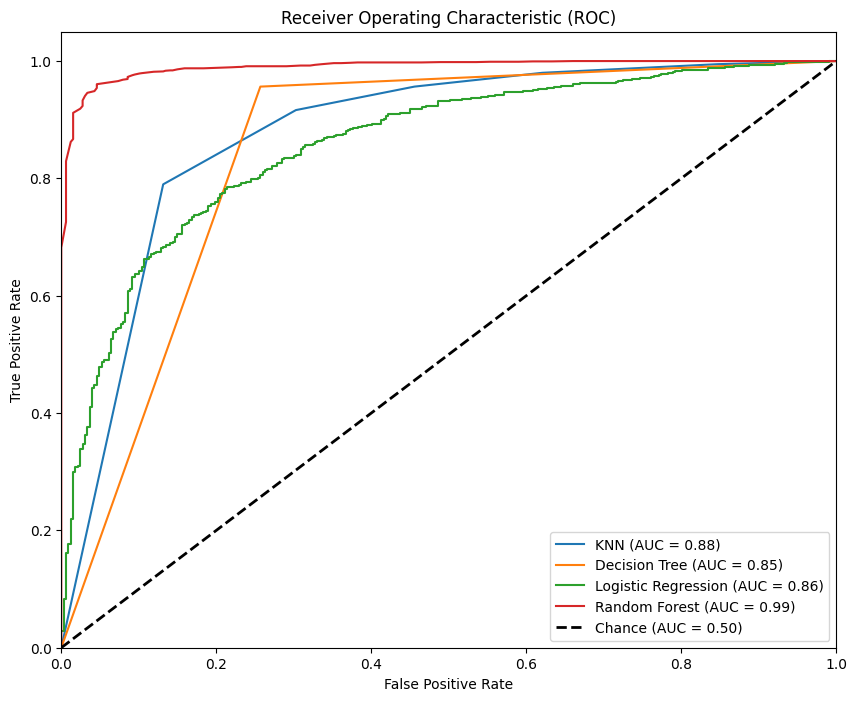

In [133]:
# Load data
df = pd.read_csv(r"data\BankChurners_preprocessed.csv")
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
model_results = {}
for model_name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    model_results[model_name] = (fpr, tpr, roc_auc)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in model_results.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# After SMOTE

In [134]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def train_evaluate_model(model, X, y, use_smote=False):
    """
    Trains and evaluates a model, with optional SMOTE resampling.
    """
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X,y)

    X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

    
    # Train model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class


    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    return accuracy, conf_matrix, classification_rep, roc_auc, fpr, tpr

In [135]:
# Load data
df = pd.read_csv(r"data\BankChurners_preprocessed.csv")
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),  
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

# Train and evaluate models
model_results = {}
for model_name, model in models.items():
    accuracy, conf_matrix, classification_rep, roc_auc, fpr, tpr = train_evaluate_model(model, X, y)
    model_results[model_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': classification_rep['weighted avg']['precision'],
        'Recall': classification_rep['weighted avg']['recall'],
        'F1-Score': classification_rep['weighted avg']['f1-score'],
        'Confusion Matrix': conf_matrix,
        'FPR': fpr,
        'TPR': tpr
    }

# Display results in a DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']])



c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy Precision    Recall  F1-Score   ROC AUC
KNN                  0.901176  0.904639  0.901176  0.900891  0.949386
Decision Tree        0.951176  0.951188  0.951176  0.951174  0.951125
Logistic Regression  0.815294  0.815455  0.815294  0.815302  0.896809
Random Forest        0.978824  0.978863  0.978824  0.978822  0.997511


In [136]:
def plot_roc_curves(model_results):
    plt.figure(figsize=(10, 8))
    for model_name, (fpr, tpr, roc_auc) in model_results.items():
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


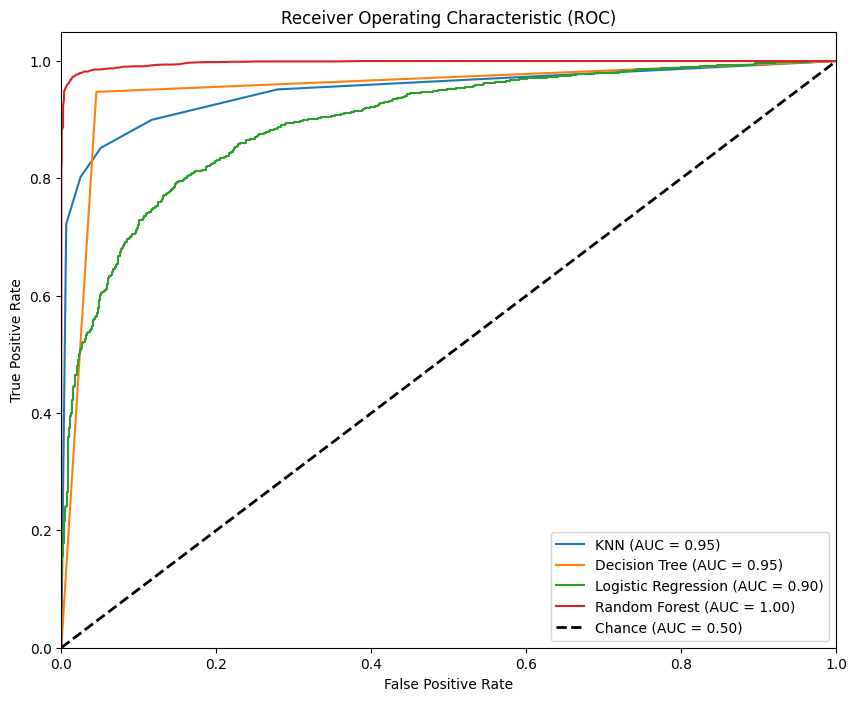

In [137]:
# Train and evaluate models
model_results = {}
for model_name, model in models.items():
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    model_results[model_name] = (fpr, tpr, roc_auc)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in model_results.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

As you see the best model is Random Forest. 
Here below you can see everything in detail. If you are curious you can see them. 

------

## KNN 

#### **Before SMOTE**

**Accuracy**: 0.8943731490621916

|       | Predicted 0 | Predicted 1 | All  |
|-------|-------------|-------------|------|
| **0** = attrited consumer | 151         | 176         | 327  |
| **1** = existed consumer | 38          | 1661        | 1699 |
| **All** | 189       | 1837        | 2026 |


Classification Report:
|               | Precision | Recall | F1-score | Support |
|---------------|-----------|--------|----------|---------|
| **0**         | 0.80      | 0.46   | 0.59     | 327     |
| **1**         | 0.90      | 0.98   | 0.94     | 1699    |
|                                                         |
| **accuracy**  |           |        | 0.89     | 2026    |
| **macro avg** | 0.85      | 0.72   | 0.76     | 2026    |
| **weighted avg** | 0.89    | 0.89   | 0.88     | 2026    |



**ROC AUC**:
 0.8814530223750974


**Cross-Validation Scores**: 
| Fold | Score       |
|------|-------------|
| 1    | 0.76011846  |
| 2    | 0.84205331  |
| 3    | 0.9254321   |
| 4    | 0.93432099  |
| 5    | 0.84098765  |


**Mean CV Score**: 0.8605825015538737

Standard Deviation in CV Scores: 0.06397366226944474

#### **After SMOTE**

**Accuracy**: 0.9264705882352942

|       | Predicted 0 | Predicted 1 | All  |
|-------|-------------|-------------|------|
| **0** | 1634        | 90          | 1724 |
| **1** | 160         | 1516        | 1676 |
| **All** | 1794      | 1606        | 3400 |


**Classification Report**:
|               | Precision | Recall | F1-score | Support |
|---------------|-----------|--------|----------|---------|
| **0**         | 0.91      | 0.95   | 0.93     | 1724    |
| **1**         | 0.94      | 0.90   | 0.92     | 1676    |
|               |           |        |          |         |
| **accuracy**  |           |        | 0.93     | 3400    |
| **macro avg** | 0.93      | 0.93   | 0.93     | 3400    |
| **weighted avg** | 0.93    | 0.93   | 0.93     | 3400    |



**ROC AUC**:
 0.9721183183914857

---------

## LOGISTIC REGRESSION

#### **Before SMOTE**

Accuracy: 0.8879565646594274

Confusion Matrix:
 Predicted    0     1   All
Actual                    
0          149   178   327
1           49  1650  1699
All        198  1828  2026

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.46      0.57       327
           1       0.90      0.97      0.94      1699

    accuracy                           0.89      2026
   macro avg       0.83      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026


ROC AUC:
 0.8990501698246676

#### **After SMOTE**

Accuracy: 0.8461764705882353

Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1421   303  1724
1           220  1456  1676
All        1641  1759  3400

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1724
           1       0.83      0.87      0.85      1676

    accuracy                           0.85      3400
   macro avg       0.85      0.85      0.85      3400
weighted avg       0.85      0.85      0.85      3400


ROC AUC:
0.9267604892878304

Cross-Validation Scores: [0.73593287 0.87709773 0.90419753 0.91654321 0.85333333]
Mean CV Score: 0.8574209352491682
Standard Deviation in CV Scores: 0.06457046899205214

--------------

## DECISION TREE

#### **Before SMOTE**

Accuracy: 0.9302402105955907

Confusion Matrix:
 Predicted  0.0   1.0   All
Actual                    
0          386   102   488
1          110  2441  2551
All        496  2543  3039

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       488
           1       0.96      0.96      0.96      2551

    accuracy                           0.93      3039
   macro avg       0.87      0.87      0.87      3039
weighted avg       0.93      0.93      0.93      3039


ROC AUC:
 0.8739316307973086

#### **After SMOTE**

Accuracy: 0.9511764705882353

Confusion Matrix:
 Predicted   0.0   1.0   All
Actual                     
0          1646    78  1724
1            88  1588  1676
All        1734  1666  3400

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1724
           1       0.95      0.95      0.95      1676

    accuracy                           0.95      3400
   macro avg       0.95      0.95      0.95      3400
weighted avg       0.95      0.95      0.95      3400


ROC AUC:
 0.9511252069616644

Cross-Validation Scores: [0.81737414 0.89141165 0.95160494 0.95111111 0.85382716]

Mean CV Score: 0.8930657989348347

Standard Deviation in CV Scores: 0.05304285788537381

--------------

## RANDOM FOREST

#### **Before SMOTE**

Accuracy: 0.9590325765054294

Confusion Matrix:
 Predicted    0     1   All
Actual                    
0          265    62   327
1           21  1678  1699
All        286  1740  2026

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026


ROC AUC:
 0.98894474713494

#### **After SMOTE**

Accuracy: 0.9794117647058823

Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1699    25  1724
1            45  1631  1676
All        1744  1656  3400

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1724
           1       0.98      0.97      0.98      1676

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400


ROC AUC:
 0.997649877622668

Cross-Validation Scores: [0.88499506 0.96396841 0.96444444 0.96790123 0.84790123]

Mean CV Score: 0.9258420776814986

Standard Deviation in CV Scores: 0.04991189477989577

--------------

## k-MEANS

- Silhouette Score: 0.15
- Davies-Bouldin Index: 2.50
- Calinski-Harabasz Index: 1201.20
- Inertia: 199165.58